# Carnet pour les analyses statistiques

## Définitions

In [9]:
from Analysis_tools import *

<code>formatted_analysis_code = "(" + ", ".join(analysis_codes) + ")"
query = f"SELECT * FROM hosp.labevents l join hosp.d_labitems dl on l.itemid = dl.itemid join hosp.patients as p on l.subject_id = p.subject_id WHERE l.itemid IN {formatted_analysis_code} LIMIT 1000;"
query
df = execute_query(query, **params) </code>



query = "SELECT COUNT(l.valuenum), subject_id AS n FROM hosp.patients AS p JOIN hosp.labevents l ON l.subject_id = p.subject_id GROUP BY p.subject_id GROUP BY l.itemid HAVING n > 0"
df2 = execute_query(query, **params)
df2

In [54]:
datas = []
n = 1000
for code in analysis_codes:
    query = f"SELECT l.valuenum, l.storetime FROM hosp.labevents l join hosp.d_labitems dl on l.itemid = dl.itemid join hosp.patients as p on l.subject_id = p.subject_id WHERE l.itemid = {code} ORDER BY l.storetime LIMIT {n} ;"
    df = execute_query(query, **params) 
    df["storetime"] = df["storetime"].apply(lambda x : x.date())
    datas.append(df)

datas[2] = execute_query(f"SELECT p.anchor_age as valuenum FROM hosp.patients as p LIMIT {n}", **params)

___
## Partie 1 : analyses simples sur les variables

In [55]:
descriptions = []
for i in range(len(datas)) :
    d = datas[i].describe()
    print(analyses["label"][i])
    print(d)
    print("\n")
    descriptions.append(d)

Albumin
         valuenum
count  1000.00000
mean      3.56890
std       0.78418
min       1.20000
25%       2.90000
50%       3.60000
75%       4.20000
max       5.60000


Creatinine
          valuenum
count  1000.000000
mean      1.165500
std       0.849636
min       0.100000
25%       0.800000
50%       0.900000
75%       1.200000
max       9.000000


Patient age
          valuenum
count  1000.000000
mean     48.663000
std      20.943545
min      18.000000
25%      29.000000
50%      48.000000
75%      64.250000
max      91.000000


Potassium
         valuenum
count  999.000000
mean     4.113013
std      0.567746
min      1.700000
25%      3.700000
50%      4.100000
75%      4.400000
max      7.200000


Urea Nitrogen
         valuenum
count  1000.00000
mean     21.37800
std      16.47047
min       2.00000
25%      12.00000
50%      17.00000
75%      24.00000
max     136.00000




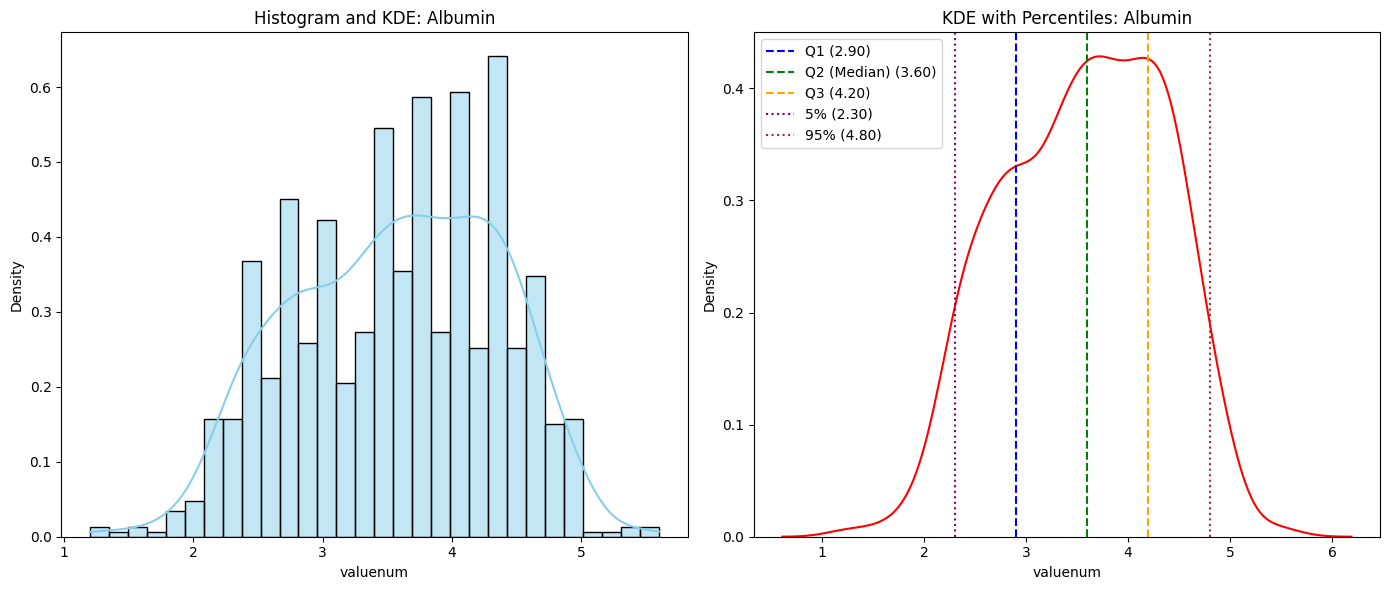

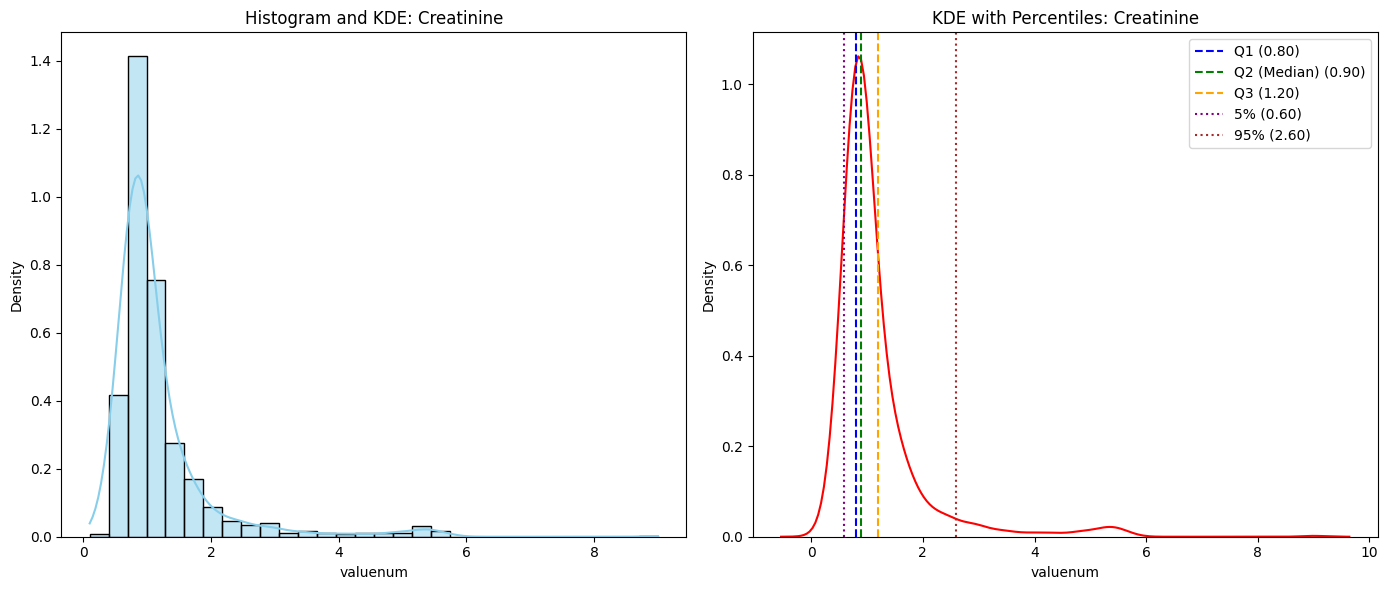

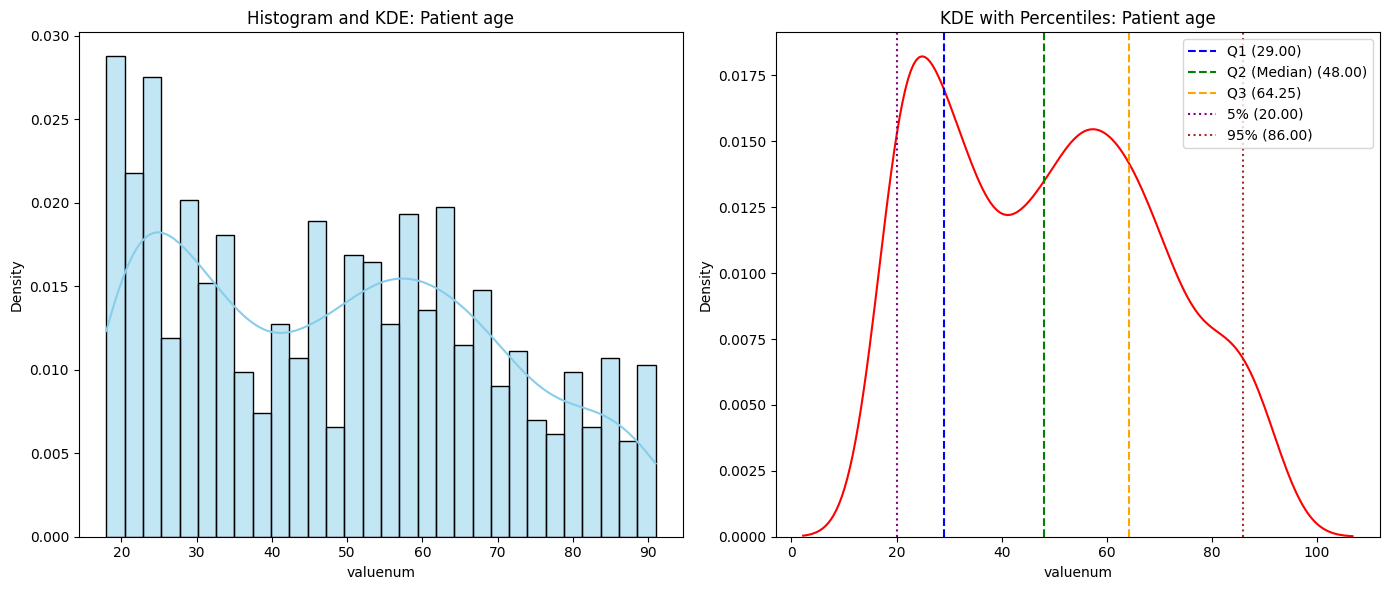

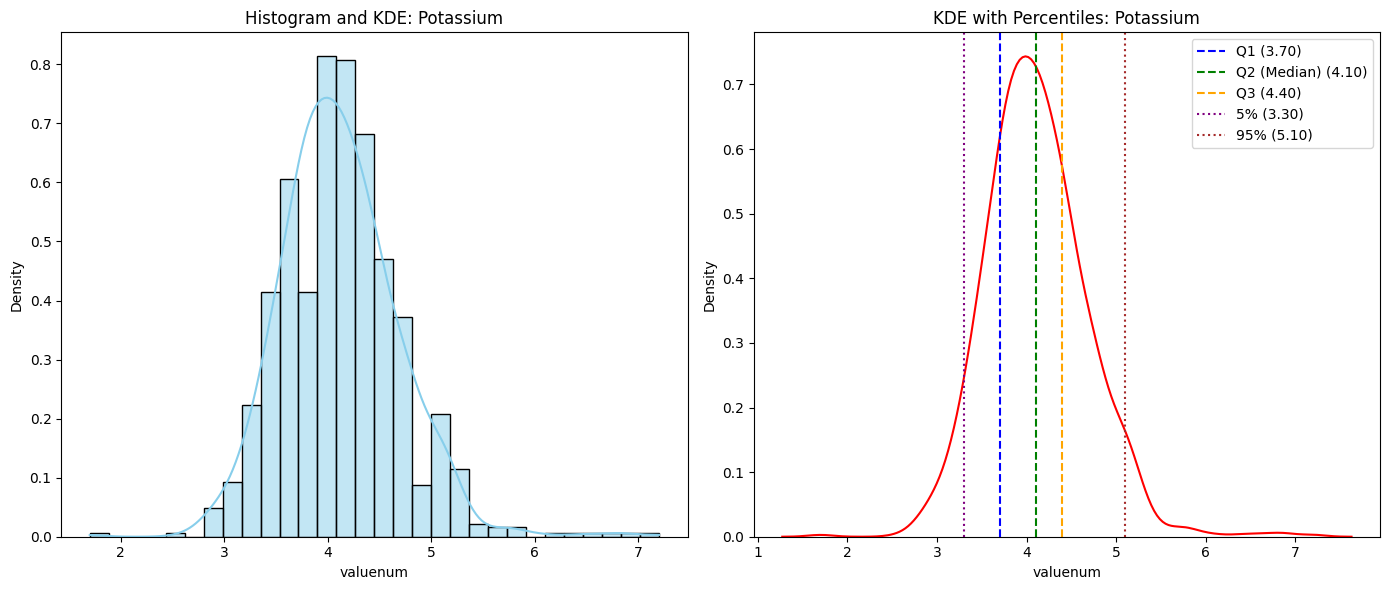

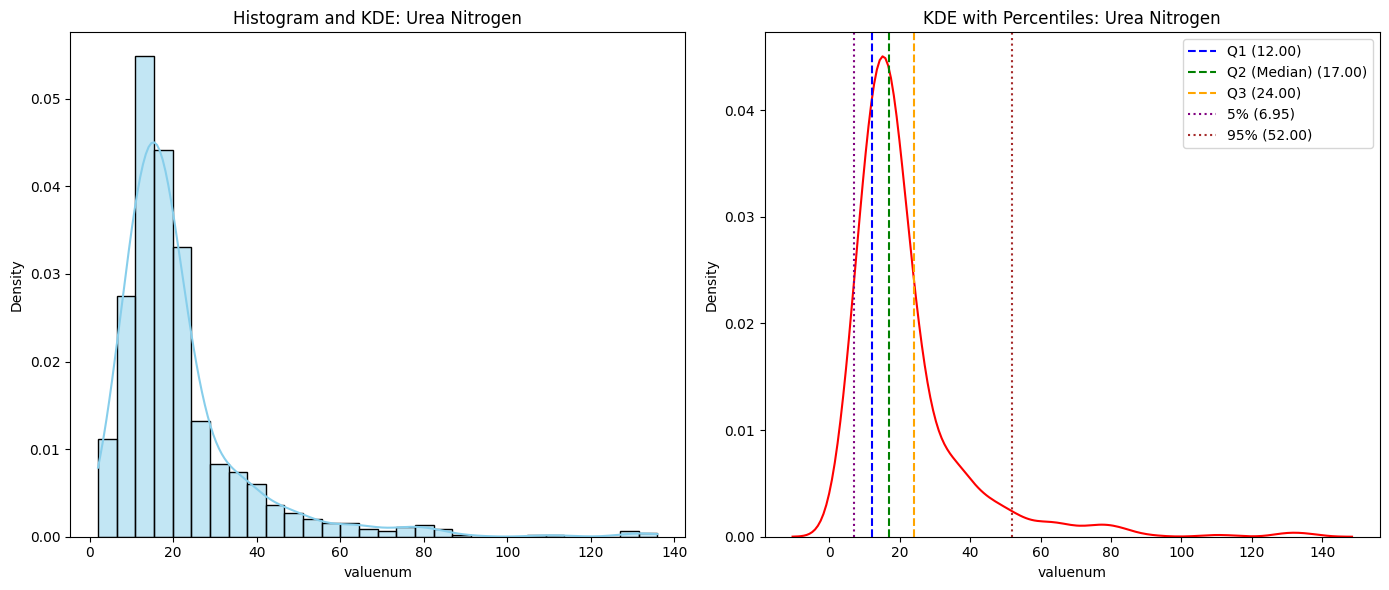

In [56]:
# Loop over each dataset (datas) in your list
for i in range(len(datas)):
    # Create a figure with two columns
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # First column: Histogram and KDE
    sns.histplot(data=datas[i], x="valuenum", kde=True, ax=axes[0], color='skyblue', bins=30, stat='density')
    axes[0].set_title(f"Histogram and KDE: {analyses['label'][i]}")

    # Second column: KDE and Percentiles (p5, p95, Q1, Q2, Q3)
    sns.kdeplot(datas[i]["valuenum"], ax=axes[1], color='red')
    axes[1].set_title(f"KDE with Percentiles: {analyses['label'][i]}")

    # Calculate quartiles and percentiles
    Q1 = descriptions[i].loc['25%'].values[0]
    Q2 = descriptions[i].loc['50%'].values[0]  # Median
    Q3 = descriptions[i].loc['75%'].values[0]

    # Calculate the 5% and 95% percentiles
    p5 = np.nanpercentile(datas[i]["valuenum"], 5)
    p95 = np.nanpercentile(datas[i]["valuenum"], 95)

    # Add vertical lines for percentiles and quartiles to the second column
    axes[1].axvline(Q1, color='blue', linestyle='--', label=f"Q1 ({Q1:.2f})")
    axes[1].axvline(Q2, color='green', linestyle='--', label=f'Q2 (Median) ({Q2:.2f})')
    axes[1].axvline(Q3, color='orange', linestyle='--', label=f"Q3 ({Q3:.2f})")
    axes[1].axvline(p5, color='purple', linestyle=':', label=f'5% ({p5:.2f})')
    axes[1].axvline(p95, color='brown', linestyle=':', label=f'95% ({p95:.2f})')

    # Add a legend to the second column
    axes[1].legend()

    # Display the plots
    plt.tight_layout()
    plt.show()


In [57]:
for i in range(len(datas)-1):
    miss = float(datas[i].isnull().mean()["valuenum"]) * 100
    print(f"{miss} % des données sont manquantes pour l'analyse : {analyses["label"][i]}")



0.0 % des données sont manquantes pour l'analyse : Albumin
0.0 % des données sont manquantes pour l'analyse : Creatinine
0.0 % des données sont manquantes pour l'analyse : Patient age
0.1 % des données sont manquantes pour l'analyse : Potassium


In [58]:
[ 'Albumin', 'Creatinine', 'Potassium', 'Patient age', 'Urea Nitrogen']

['Albumin', 'Creatinine', 'Potassium', 'Patient age', 'Urea Nitrogen']

In [1]:
# The list of missing data percentages
l_miss = []

# The custom labels for each bar
labels = []

for i in range(len(datas)-1):
    l_miss.append(float(datas[i].isnull().mean()["valuenum"]) * 100)
    labels.append(analyses["label"][i])

# Create a bar chart
plt.bar(labels, l_miss, color='skyblue')

# Adding labels and title
plt.xlabel('Parameters')
plt.ylabel('Missing Data Percentage')
plt.title('Missing Data Percentage per Parameter')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()


NameError: name 'datas' is not defined

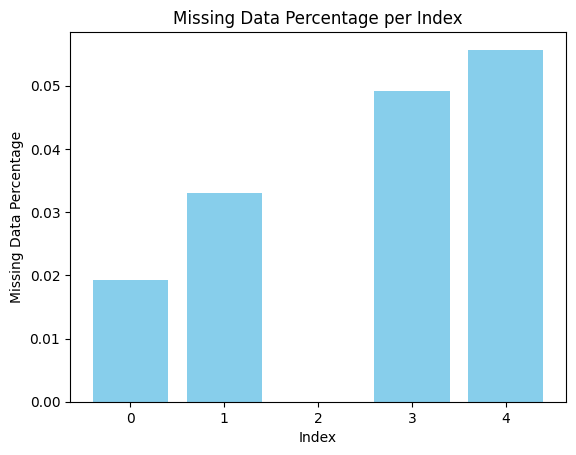

In [10]:
l_miss = [0.019201433707050127, 0.033, 0.0, 0.0492, 0.0557]

# Create a bar chart
plt.bar(range(len(l_miss)), l_miss, color='skyblue')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Missing Data Percentage')
plt.title('Missing Data Percentage per Index')

# Show the plot
plt.show()


In [61]:
datas[2].describe()

,valuenum
count,1000.000000
mean,48.663000
std,20.943545
min,18.000000
25%,29.000000
50%,48.000000
75%,64.250000
max,91.000000


In [62]:
datas[0].describe()

,valuenum
count,1000.00000
mean,3.56890
std,0.78418
min,1.20000
25%,2.90000
50%,3.60000
75%,4.20000
max,5.60000


In [63]:
import datetime
datas[0]["storetime"].iloc[0]

datetime.date(2105, 10, 4)

___
## Partie 2 : analyses des relations entre les variables

In [4]:
query = f"SELECT l.valuenum, l.storetime, l.itemid, dl.label FROM hosp.labevents l join hosp.d_labitems dl on l.itemid = dl.itemid join hosp.patients as p on l.subject_id = p.subject_id WHERE l.itemid IN {sqlify(analysis_codes)} ORDER BY l.storetime LIMIT {n} ;"
df0 = execute_query(query, **params) 
#df0["storetime"] = df0["storetime"].apply(lambda x : x.date())
#datas.append(df0)
df0

,valuenum,storetime,itemid,label
0,24.0,2105-10-04 18:17:00,51006,Urea Nitrogen
1,1.1,2105-10-04 18:17:00,50912,Creatinine
2,3.8,2105-10-04 18:17:00,50971,Potassium
3,2.4,2105-10-04 18:17:00,50862,Albumin
4,3.6,2105-10-05 02:59:00,50971,Potassium
...,...,...,...,...
995,20.0,2109-10-03 15:23:00,51006,Urea Nitrogen
996,1.3,2109-10-03 15:23:00,50912,Creatinine
997,3.8,2109-10-03 15:23:00,50862,Albumin
998,0.6,2109-10-03 16:53:00,50912,Creatinine


In [65]:
type(df0.at[0, "storetime"])

pandas._libs.tslibs.timestamps.Timestamp

label          Creatinine  Urea Nitrogen  Potassium  Albumin
label                                                       
Creatinine            0.0            0.0        0.0      0.0
Urea Nitrogen         0.0            0.0        0.0      0.0
Potassium             0.0            0.0        0.0      0.0
Albumin               0.0            0.0        0.0      0.0


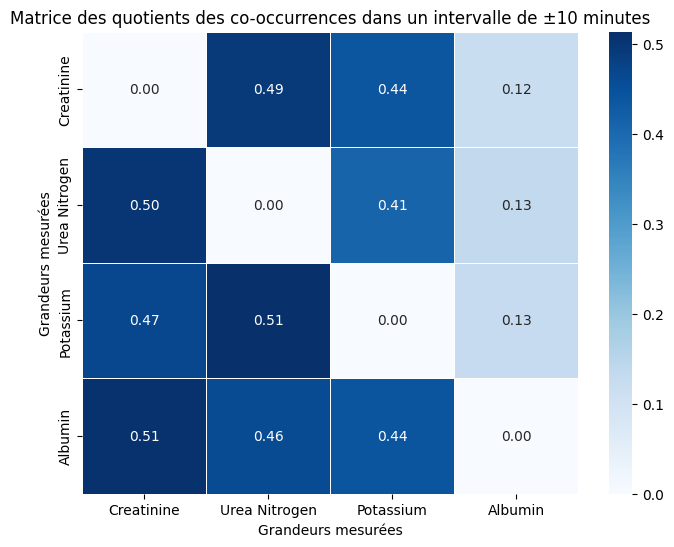

In [67]:

total_counts0 = df0['label'].value_counts()
# Création d'une matrice pour stocker les quotients des co-occurrences
grandeurs0 = total_counts0.index
matrix0 = pd.DataFrame(0.0, index=grandeurs0, columns=grandeurs0)
print(matrix0)

# Utilisation de la méthode de fenêtre glissante pour compter les co-occurrences
start = 0
for end in range(len(df0)):
    
    # Déterminer la fenêtre de 10 min
    date_1 = df0.iloc[end]['storetime']
    date_2 = df0.iloc[start]['storetime']
    delta_dates = date_1 - date_2
    while delta_dates.total_seconds() > 600 :
        start += 1  # Déplacer 'start' pour exclure les éléments trop anciens
        date_2 = df0.iloc[start]['storetime']
        delta_dates = date_1 - date_2

    # Comptabiliser les co-occurrences dans la fenêtre
    for i in range(start, end):
        grandeur_1 = df0.iloc[i]['label']
        grandeur_2 = df0.iloc[end]['label']
        if grandeur_1 != grandeur_2:
            matrix0.at[grandeur_1, grandeur_2] += 1

# Normalisation par le nombre total d'apparitions de chaque grandeur
for grandeur in grandeurs0:
    matrix0.loc[grandeur] /= total_counts0[grandeur]

# Tracer la heatmap avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix0, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Matrice des quotients des co-occurrences dans un intervalle de ±10 minutes")
plt.xlabel("Grandeurs mesurées")
plt.ylabel("Grandeurs mesurées")
plt.show()


In [68]:
grandeurs0

Index(['Creatinine', 'Urea Nitrogen', 'Potassium', 'Albumin'], dtype='object', name='label')

In [69]:
total_counts0

label
Creatinine       314
Urea Nitrogen    300
Potassium        284
Albumin          102
Name: count, dtype: int64

### Distplots

In [103]:
grandeurs0 = ['Creatinine', 'Urea Nitrogen', 'Potassium', 'Albumin']
# Separate the columns that need to be pivoted and the ones to remain unchanged
df_measurements = df0[['label', 'valuenum']]  # Columns related to the measurements
df_other = df0.drop(columns=['label', 'valuenum'])  # All other columns to remain unchanged

# Pivoting the measurement-related DataFrame
df_separated = df_measurements.pivot(columns='label', values='valuenum')

# Reorder columns in the correct order (if needed)
df_separated = df_separated[grandeurs0]  # 'grandeurs0' contains the correct order of labels

# If any measurement is missing, it will be represented as np.nan
df_separated = df_separated.fillna(np.nan)

# Merge the pivoted data back with the remaining columns (those not pivoted)
df_final = pd.concat([df_separated, df_other], axis=1)

# Display the result
df_final


,Creatinine,Urea Nitrogen,Potassium,Albumin,storetime,itemid
0,NaN,24.0,NaN,NaN,2105-10-04 18:17:00,51006
1,NaN,NaN,3.8,NaN,2105-10-04 18:17:00,50971
2,1.1,NaN,NaN,NaN,2105-10-04 18:17:00,50912
3,NaN,NaN,NaN,2.4,2105-10-04 18:17:00,50862
4,1.0,NaN,NaN,NaN,2105-10-05 02:59:00,50912
...,...,...,...,...,...,...
999995,NaN,NaN,4.5,NaN,2122-06-10 09:13:00,50971
999996,NaN,22.0,NaN,NaN,2122-06-10 09:13:00,51006
999997,NaN,23.0,NaN,NaN,2122-06-10 09:19:00,51006
999998,NaN,NaN,4.7,NaN,2122-06-10 09:19:00,50971


In [71]:
from itertools import permutations

# Initialize variables for the result
result_rows = []

# Iterate through each row and group measurements that are within 10 minutes
for i in range(len(df0)):
    # Start a group with the current row
    group = [df0.iloc[i]]
    
    # Check the subsequent rows to add to the current group if within 10 minutes
    for j in range(i + 1, len(df0)):
        time_diff = (df0.iloc[j]['storetime'] - group[0]['storetime']).total_seconds()
        
        if time_diff <= 600:  # If within 10 minutes, add to the group
            group.append(df0.iloc[j])
        else:
            break  # Stop adding further rows to this group if time difference exceeds 10 minutes

    # Generate all combinations of measurements
    measurement_types = grandeurs0.tolist()
    measurements_in_group = {label: np.nan for label in measurement_types}

    # Fill measurements that are present in the group
    for row in group:
        measurements_in_group[row['label']] = row['valuenum']
    
    # Generate all combinations of the available measurements
    non_na_measurements = {key: value for key, value in measurements_in_group.items() if not pd.isna(value)}
    
    if len(non_na_measurements) == 0:
        continue

    # Get all possible combinations of the measurements in the group
    for comb in permutations(non_na_measurements.items(), len(non_na_measurements)):
        new_row = {'storetime': group[0]['storetime']}
        
        # Add each combination to the new row
        for idx, (label, val) in enumerate(comb):
            new_row[label] = val
        
        # Fill missing combinations with NaN
        for label in measurement_types:
            if label not in new_row:
                new_row[label] = np.nan
        
        # Add the new row to the result list
        result_rows.append(new_row)

# Convert the result list of rows into a DataFrame
df_final = pd.DataFrame(result_rows).drop_duplicates().drop(columns="storetime")

# Display the final DataFrame
df_final


,Creatinine,Urea Nitrogen,Potassium,Albumin
0,1.1,24.0,3.8,2.4
24,NaN,24.0,3.8,2.4
30,NaN,24.0,3.8,NaN
32,NaN,NaN,3.8,NaN
33,1.0,22.0,3.6,NaN
...,...,...,...,...
4585,1.3,20.0,3.4,NaN
4591,1.3,NaN,3.4,NaN
4593,1.3,NaN,NaN,NaN
4594,0.6,NaN,NaN,NaN


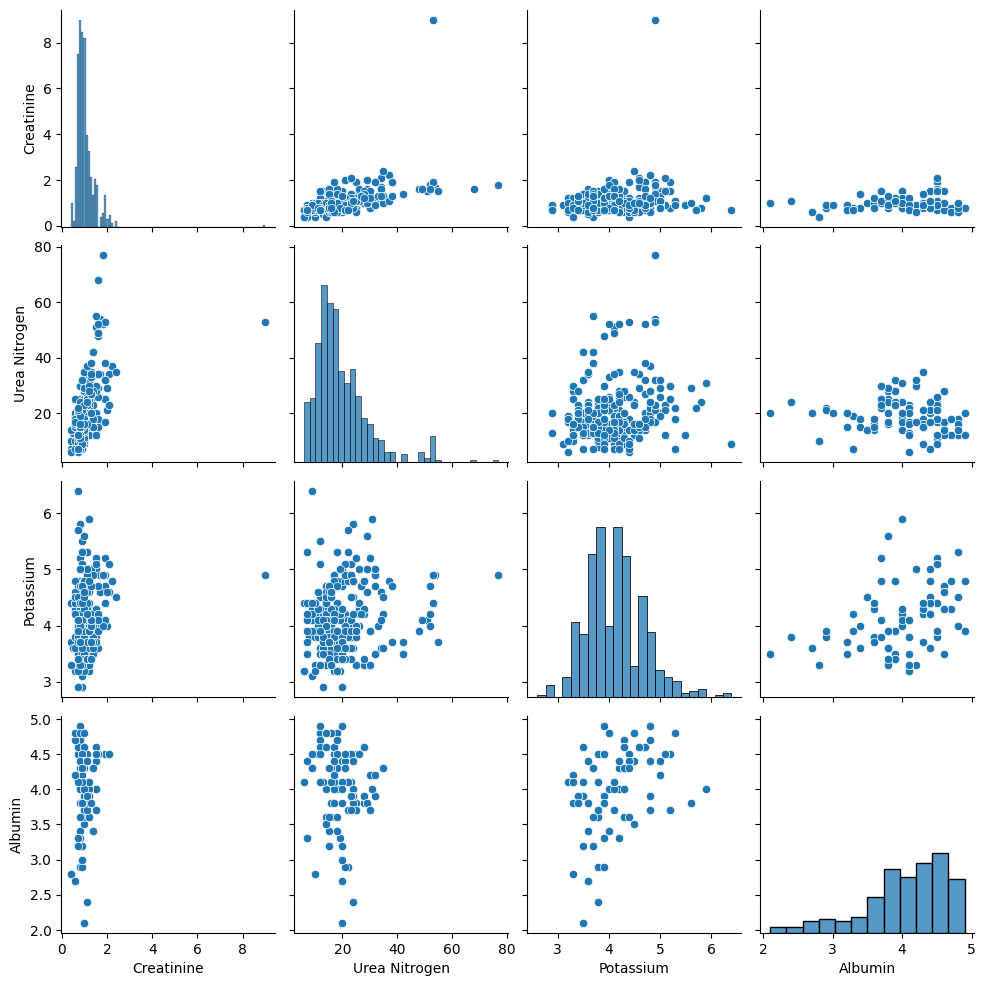

In [72]:
sns.pairplot(data=df_final)

Text(0.5, 1.0, 'Correlation Heatmap')

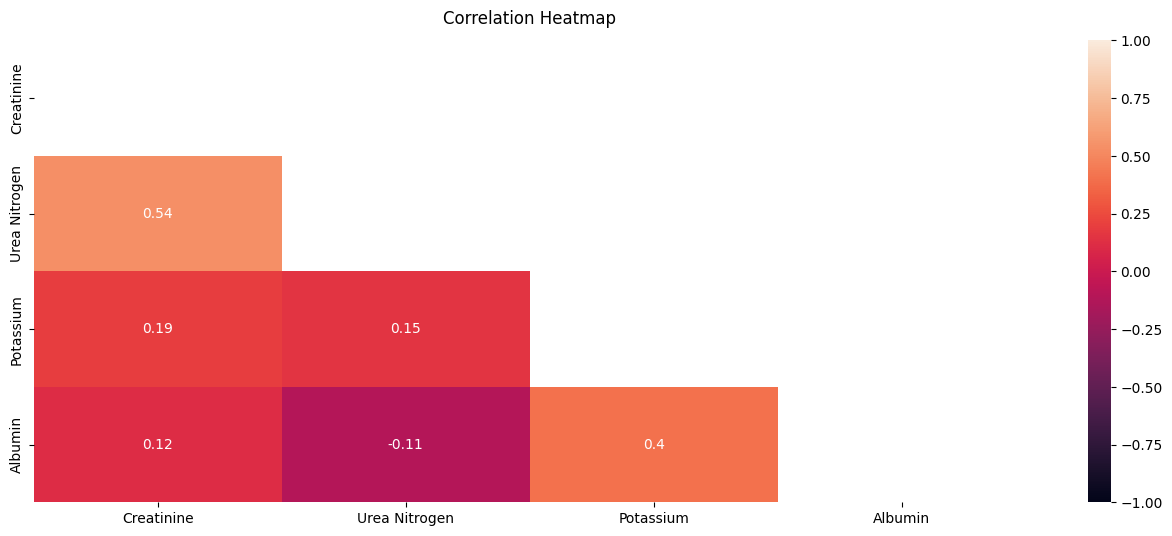

In [73]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_final.corr(), dtype=np.bool))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_final.corr(), vmin=-1, vmax=1, mask=mask, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [105]:
n = 1000000

In [107]:

code_list_formatted = "(" + ", ".join(analysis_codes) +")"
print(code_list_formatted)
query = f"SELECT l.valuenum, l.storetime, l.itemid, dl.label FROM hosp.labevents l join hosp.d_labitems dl on l.itemid = dl.itemid join hosp.patients as p on l.subject_id = p.subject_id WHERE l.itemid IN {code_list_formatted} LIMIT {n} ;"
df1 = execute_query(query, **params) 
datas.append(df1)
df1

(50862, 50912, 0, 50971, 51006)


,valuenum,storetime,itemid,label
0,1.1,2146-06-28 11:09:00,50912,Creatinine
1,4.2,2146-06-28 11:09:00,50971,Potassium
2,12.0,2146-06-28 11:09:00,51006,Urea Nitrogen
3,3.3,2146-08-10 14:26:00,50862,Albumin
4,1.1,2146-08-10 14:26:00,50912,Creatinine
...,...,...,...,...
999995,8.0,2143-08-11 17:43:00,51006,Urea Nitrogen
999996,0.7,2143-09-17 23:36:00,50912,Creatinine
999997,4.2,2143-09-17 23:36:00,50971,Potassium
999998,6.0,2143-09-17 23:36:00,51006,Urea Nitrogen


In [108]:
df_separated = separate_values(df1, grandeurs0)
df_separated


,Creatinine,Urea Nitrogen,Potassium,Albumin,storetime,itemid
0,1.1,NaN,NaN,NaN,2146-06-28 11:09:00,50912
1,NaN,NaN,4.2,NaN,2146-06-28 11:09:00,50971
2,NaN,12.0,NaN,NaN,2146-06-28 11:09:00,51006
3,NaN,NaN,NaN,3.3,2146-08-10 14:26:00,50862
4,1.1,NaN,NaN,NaN,2146-08-10 14:26:00,50912
...,...,...,...,...,...,...
999995,NaN,8.0,NaN,NaN,2143-08-11 17:43:00,51006
999996,0.7,NaN,NaN,NaN,2143-09-17 23:36:00,50912
999997,NaN,NaN,4.2,NaN,2143-09-17 23:36:00,50971
999998,NaN,6.0,NaN,NaN,2143-09-17 23:36:00,51006


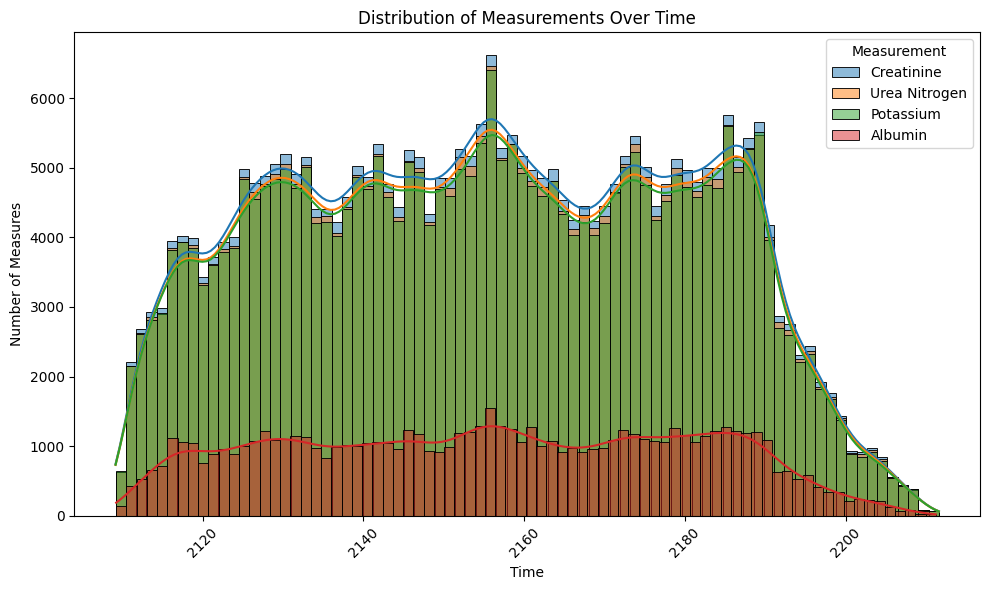

In [111]:
def rm(i, l):
    return l[:i] + l[i+1:]

# Create a single figure (1 graph)
plt.figure(figsize=(10, 6))

# Define the measurements
labels = ['Creatinine', 'Urea Nitrogen', 'Potassium', 'Albumin']

# Loop over the labels to plot each measurement on the same graph
for i, label in enumerate(labels):
    # Filter data for the current measurement
    data = df_separated.dropna(subset=[label])
    data = data.drop(columns=rm(i, labels) + ['itemid'])
    
    # Create the histplot for the current measurement
    sns.histplot(data=data, x='storetime', kde=True, bins=80, label=label)

# Set title and labels
plt.title('Distribution of Measurements Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Measures')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend to identify the measurements
plt.legend(title='Measurement')

# Show the plot
plt.tight_layout()
plt.show()
